**Лабораторная работа №4 ЭЭГ**

Аплавина

Назирджонов

Никитин

P33211

**Цель работы:**\
Произвести замеры бета волн (бодрствование, выполнение задач по математике, выполнение задач по программированию, игра)  и альфа (с закрытыми глазами, закрытыми глазами и бодрая музыка, например Louna, спокойная музыка) Сравнить, сделать выводы\
\
**Испытуемый:**\
Измерения проводились на Некруза

# Импортируем данные

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1UVoVnsWVWE0Z0HQ0lAW-ZsghlDQ_1okI' -O EEG_1_bodr.dat
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1W4Sd0zMQlPp75udCMR9QShDNjKlczb6W' -O EEG_1_mat.dat
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1dfF9tLO2NreDIkgUvACIb2l1uf6gBeeH' -O EEG_1_prog.dat
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1VV8Layu_wxNpwer9RsfrfJaZEng7J5Kj' -O EEG_1_game.dat

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1KFEvNNBUpv61IqyYSknO1gE5pty7-nrN' -O EEG_2_sleep.dat
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1qJRjsWVXiFyG9xXdVPjQjI3HBsMTICiO' -O EEG_2_music_hard.dat
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1-jyuIm7auMR5iKzBUjW_a8hHZWXFx4x9' -O EEG_2_music_soft.dat



# Импортируем библиотеки

In [ ]:
!pip install mne

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from scipy.signal import welch


# Функции

In [ ]:
def create(path):
    data = pd.read_csv(path, sep = "\t", names =["x", "y"])
    data['x'] -= data['x'].min()
    display(data)
    return data

def plot_line(data, title):
    x = data['x']
    y = data['y']
    plt.figure(figsize=(20,6))
    plt.plot(x, y)
    plt.title(title)
    plt.grid('on')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.show()

def plot_spectrum(frequencies, spectrum):
    plt.figure(figsize=(20,6))
    plt.plot(frequencies, spectrum)
    plt.title('Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid('on')
    plt.show()

def power_density(data):
  fs = 310
  f, Pxx_den = welch(data, fs, nperseg=1024)
  f = f[f < 40]
  Pxx_den = Pxx_den[:len(f)]
  plt.semilogy(f, Pxx_den)
  plt.xlim((0, 45))
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.show()

def spectro(data):
  time = np.array(data['x'])
  alpha_amplitude = np.array(data['y'])
  frequencies, times, Sxx = spectrogram(alpha_amplitude,fs=310)
  frequencies = frequencies[frequencies < 40]
  Sxx = Sxx[:len(frequencies)]
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
  plt.colorbar(label='Power (dB)')
  plt.title('Waves Spectrogram')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()
  plot_spectrum(frequencies, Sxx)
  power_density(data['y'])

#Бета-волны

##Бодрствование

In [ ]:
bodr = create("/content/EEG_1_bodr.dat")

,x,y
0,0.000000,2.450980
1,0.000000,2.470588
2,0.003967,2.274510
3,0.008118,2.431373
4,0.012238,2.529412
...,...,...
39305,123.113220,2.960784
39306,123.117279,2.039216
39307,123.121368,2.196079
39308,123.125488,1.941176


In [ ]:
bodr = bodr.drop_duplicates(subset=['x'])

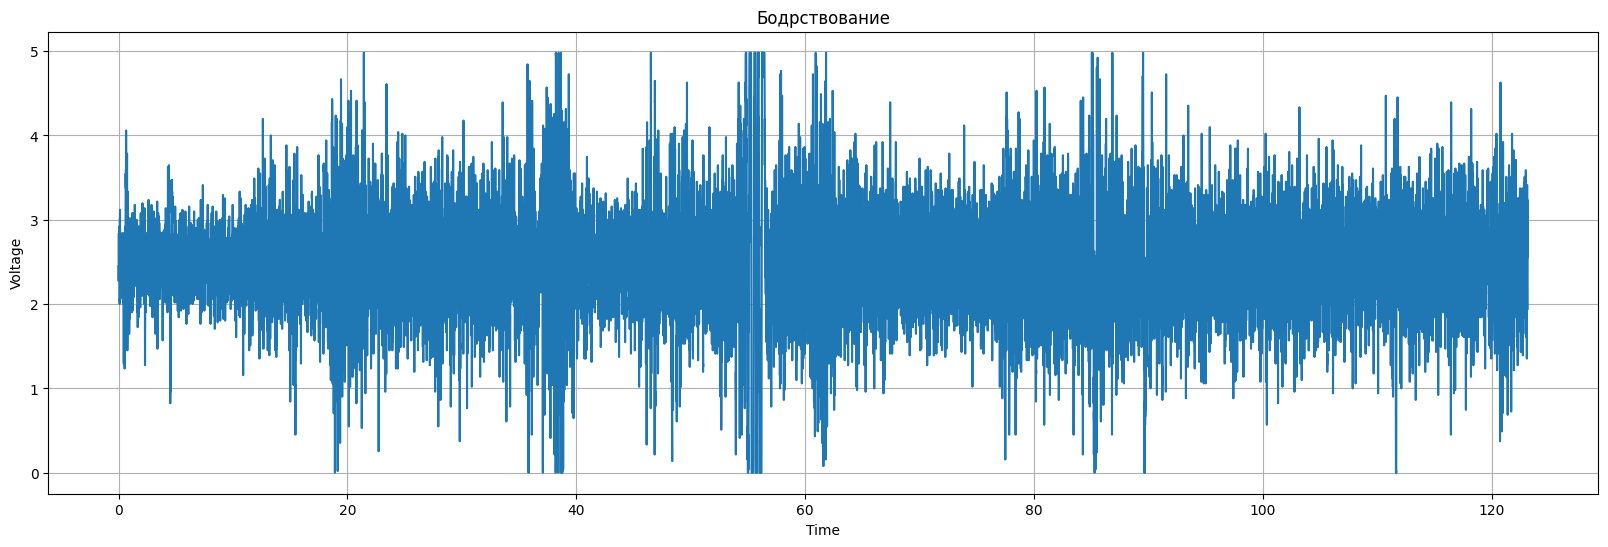

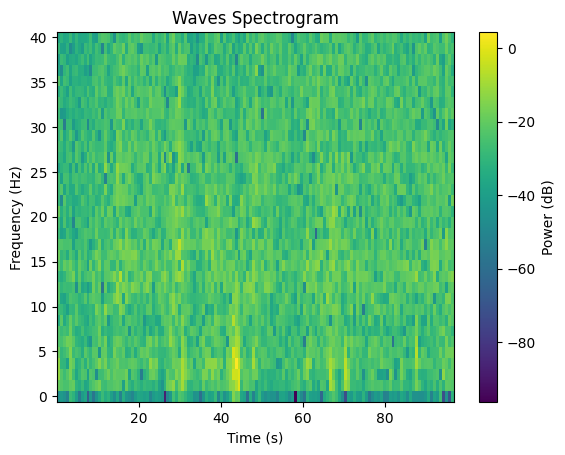

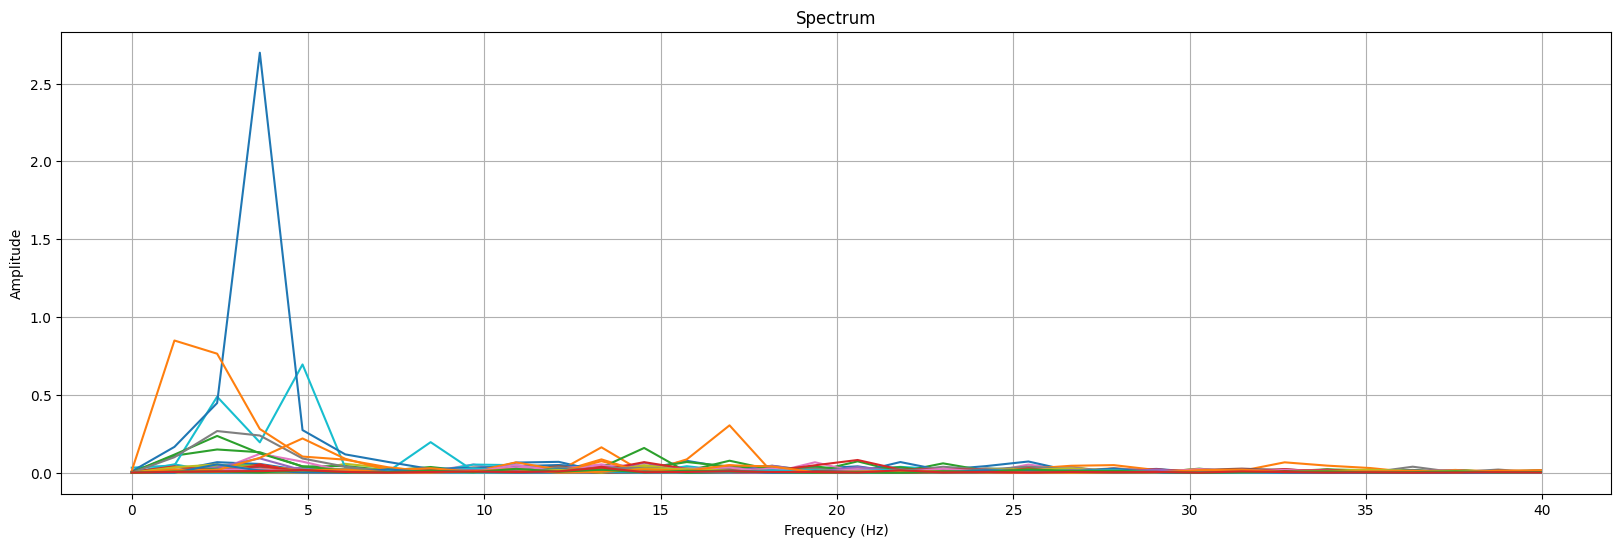

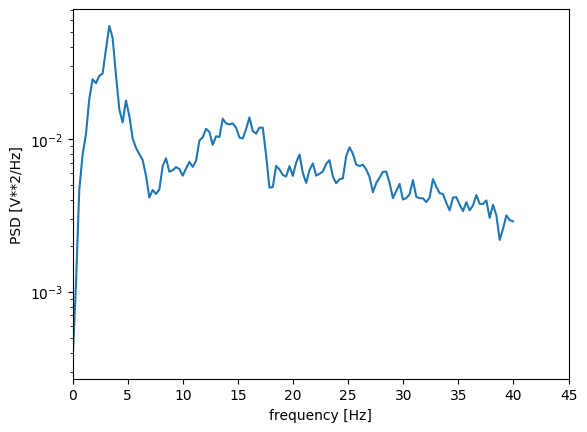

In [ ]:
plot_line(bodr, "Бодрствование")
spectro(bodr)

##Выполнение задач по математике

In [ ]:
math = create("/content/EEG_1_mat.dat")

,x,y
0,0.000000,2.039216
1,0.004059,2.549020
2,0.008133,2.705882
3,0.008133,3.254902
4,0.012299,3.725490
...,...,...
38926,121.921188,1.607843
38927,121.925339,1.607843
38928,121.929306,1.666667
38929,121.933426,2.019608


In [ ]:
math = math.drop_duplicates(subset=['x'])

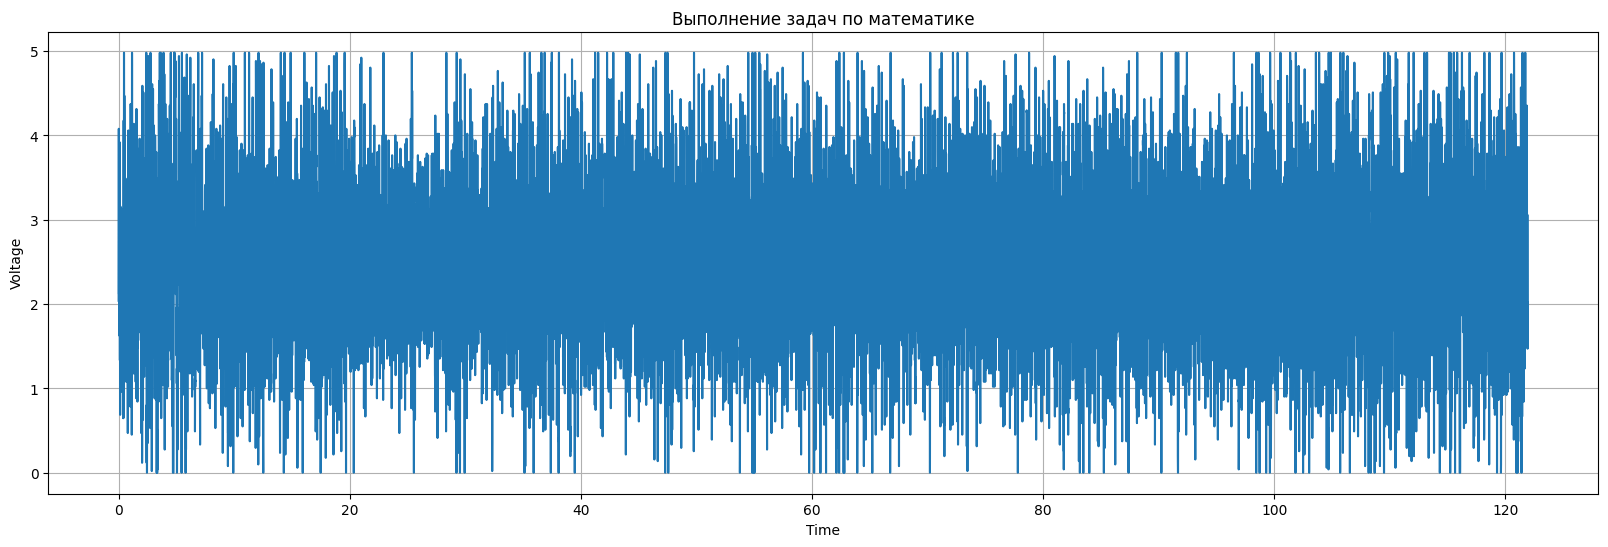

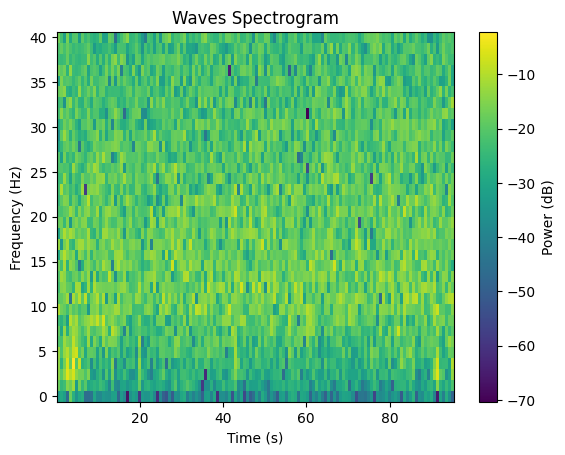

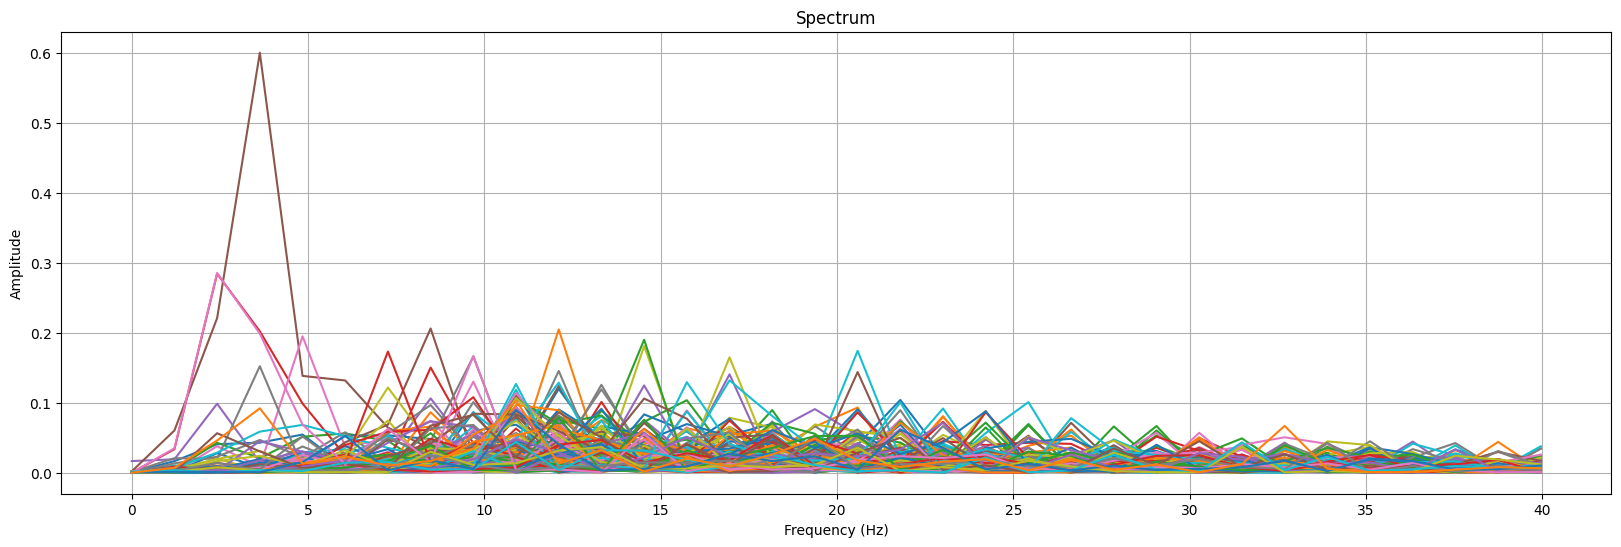

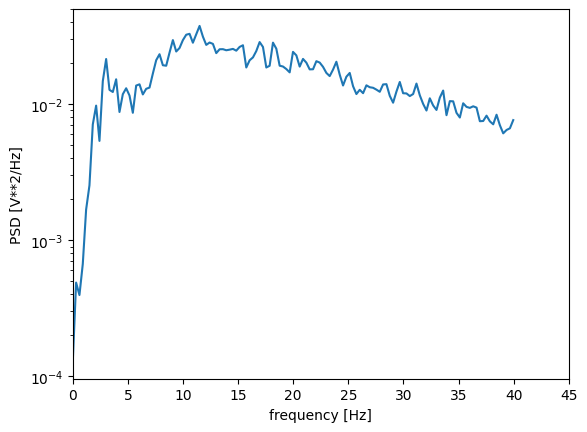

In [ ]:
plot_line(math,'Выполнение задач по математике')
spectro(math)

##Выполнение задач по программированию

In [ ]:
prog = create("/content/EEG_1_prog.dat")

,x,y
0,0.000000,1.196078
1,0.000000,1.392157
2,0.004120,2.098039
3,0.008087,2.705882
4,0.008087,2.901961
...,...,...
38770,121.454132,2.843137
38771,121.458313,2.098039
38772,121.462433,1.843137
38773,121.462433,2.254902


In [ ]:
prog = prog.drop_duplicates(subset=['x'])

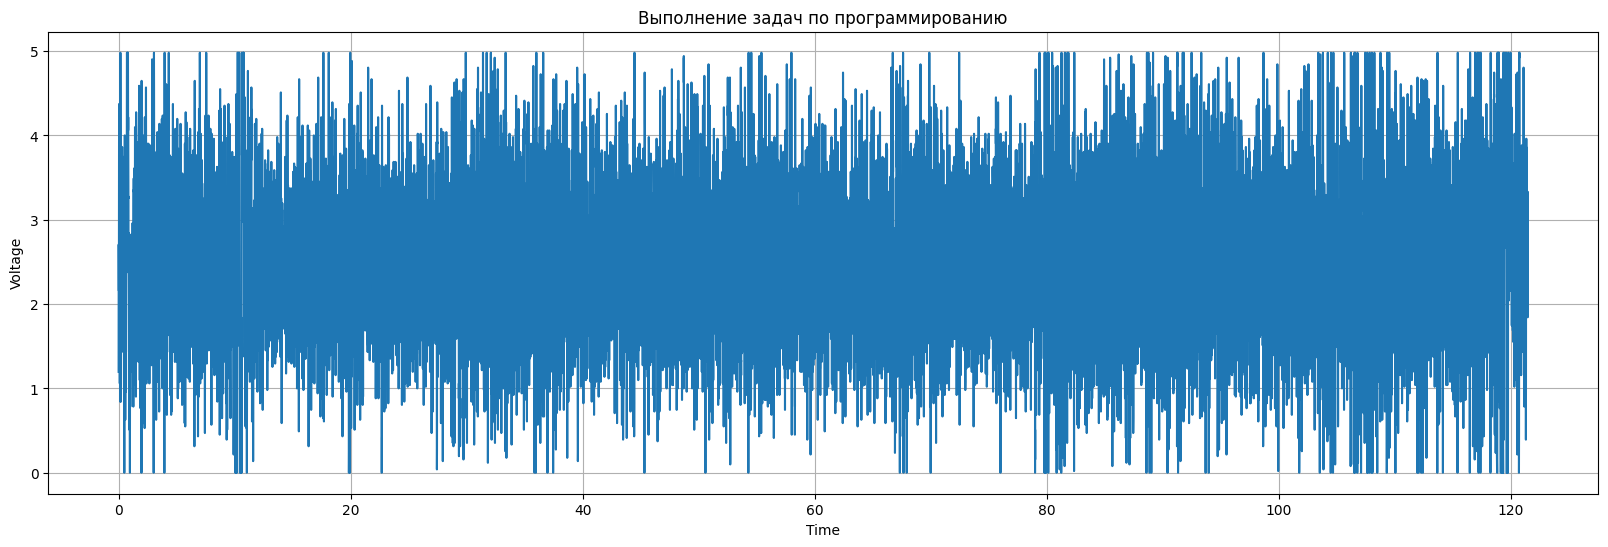

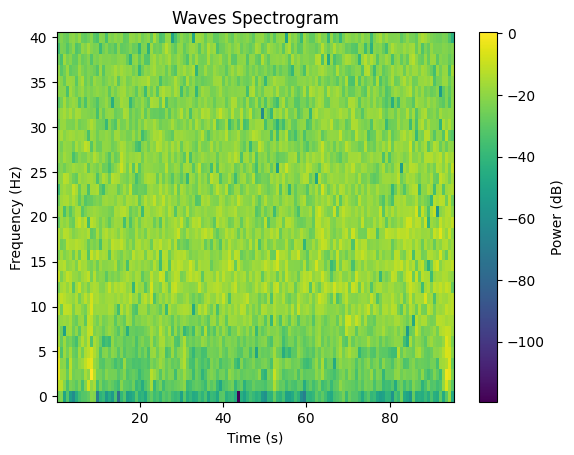

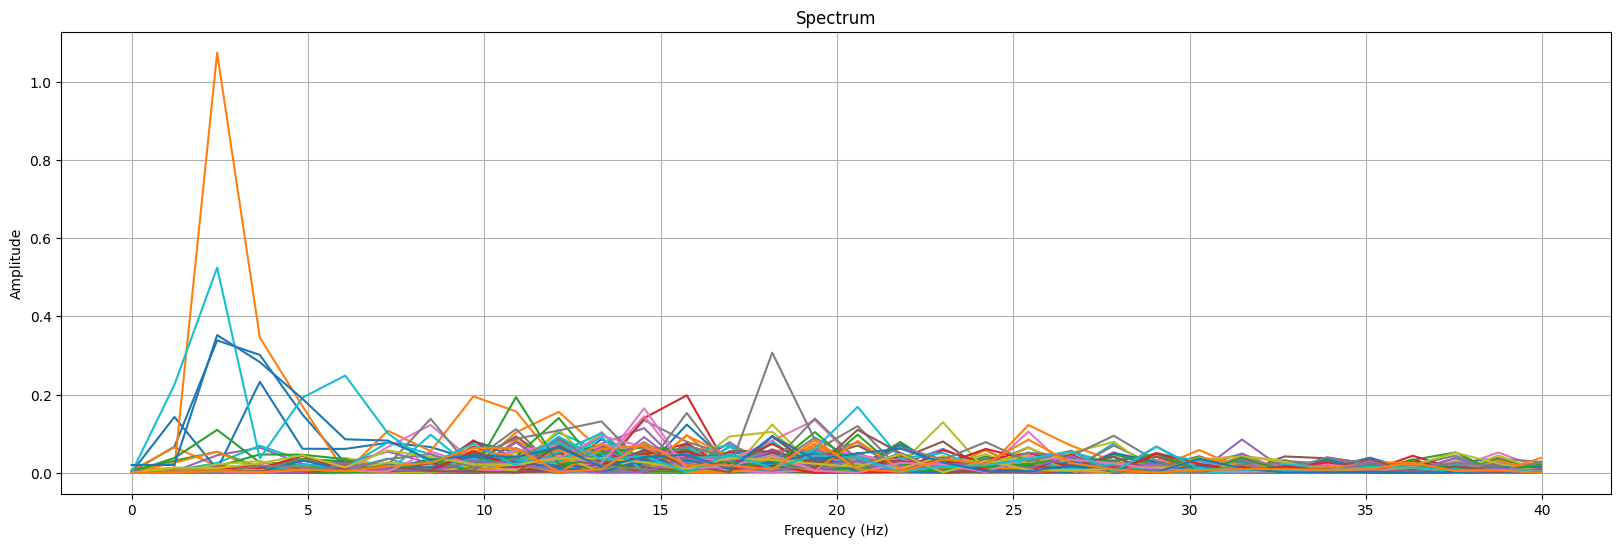

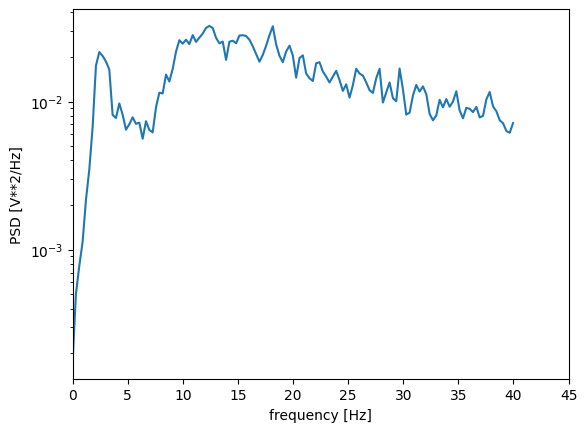

In [ ]:
plot_line(prog,'Выполнение задач по программированию')
spectro(prog)

##Игра

In [ ]:
game= create("/content/EEG_1_game.dat")

,x,y
0,0.000000,1.784314
1,0.004150,2.019608
2,0.008179,2.313725
3,0.008179,2.647059
4,0.012268,3.098039
...,...,...
45662,143.038025,2.862745
45663,143.042297,1.686275
45664,143.042297,1.215686
45665,143.046265,1.490196


In [ ]:
game = game.drop_duplicates(subset=['x'])

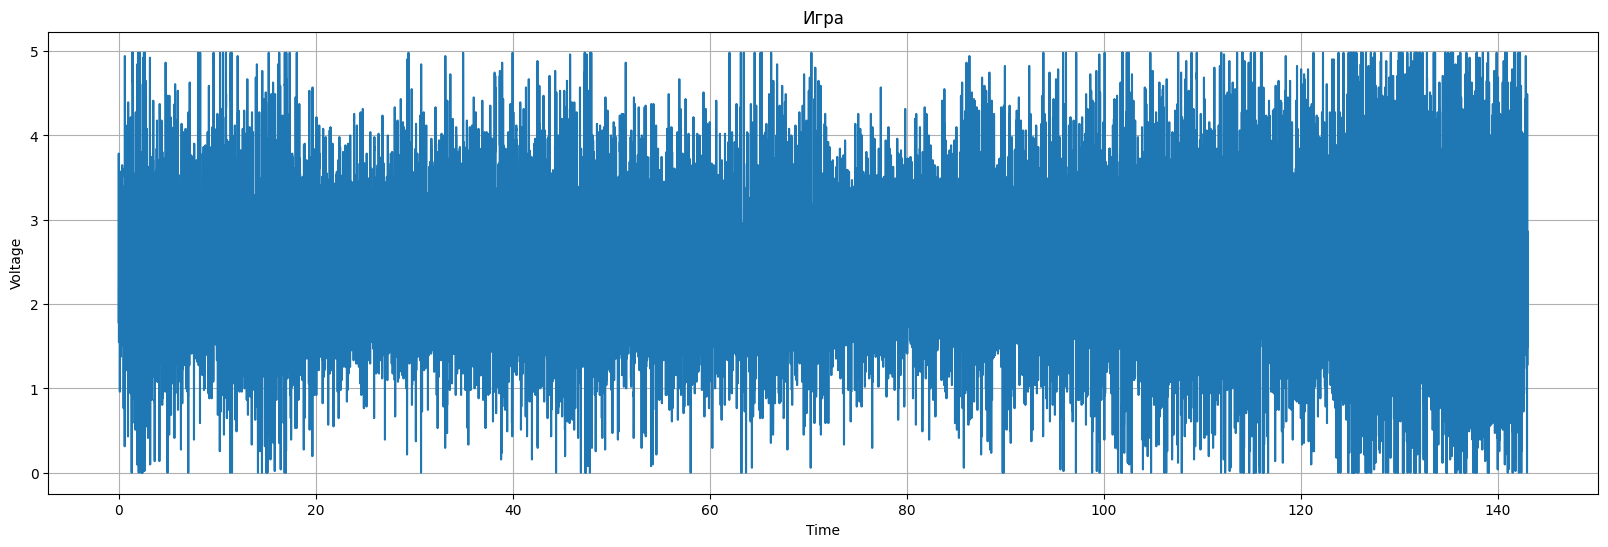

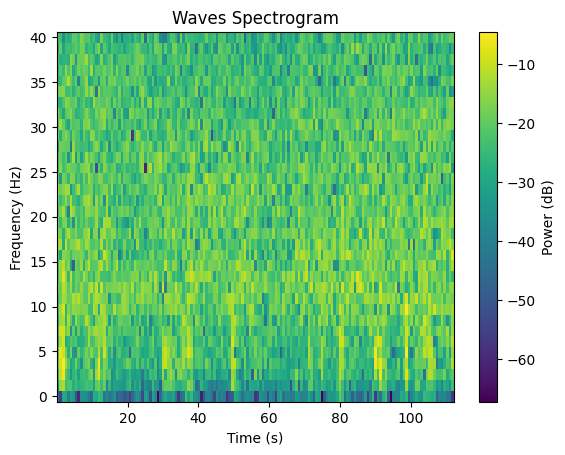

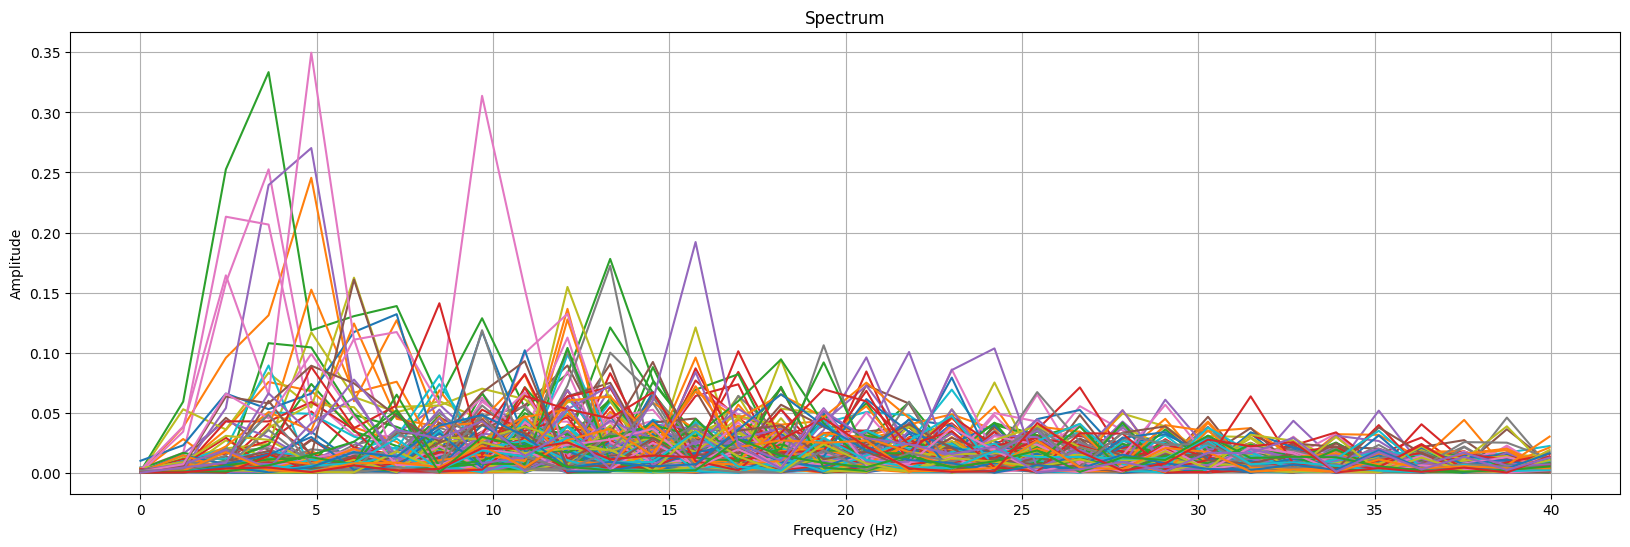

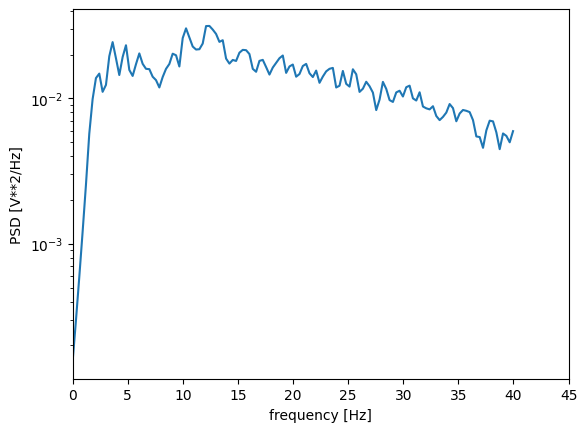

In [ ]:
plot_line(game,'Игра')
spectro(game)

#Альфа-волны

##С закрытыми глазами

In [ ]:
sleep = create("/content/EEG_2_sleep.dat")

,x,y
0,0.000000,1.803922
1,0.004028,1.745098
2,0.008179,2.549020
3,0.008179,3.196079
4,0.012329,3.254902
...,...,...
38885,121.785889,3.254902
38886,121.789917,3.549020
38887,121.794189,3.549020
38888,121.798218,2.235294


In [ ]:
sleep = sleep.drop_duplicates(subset=['x'])

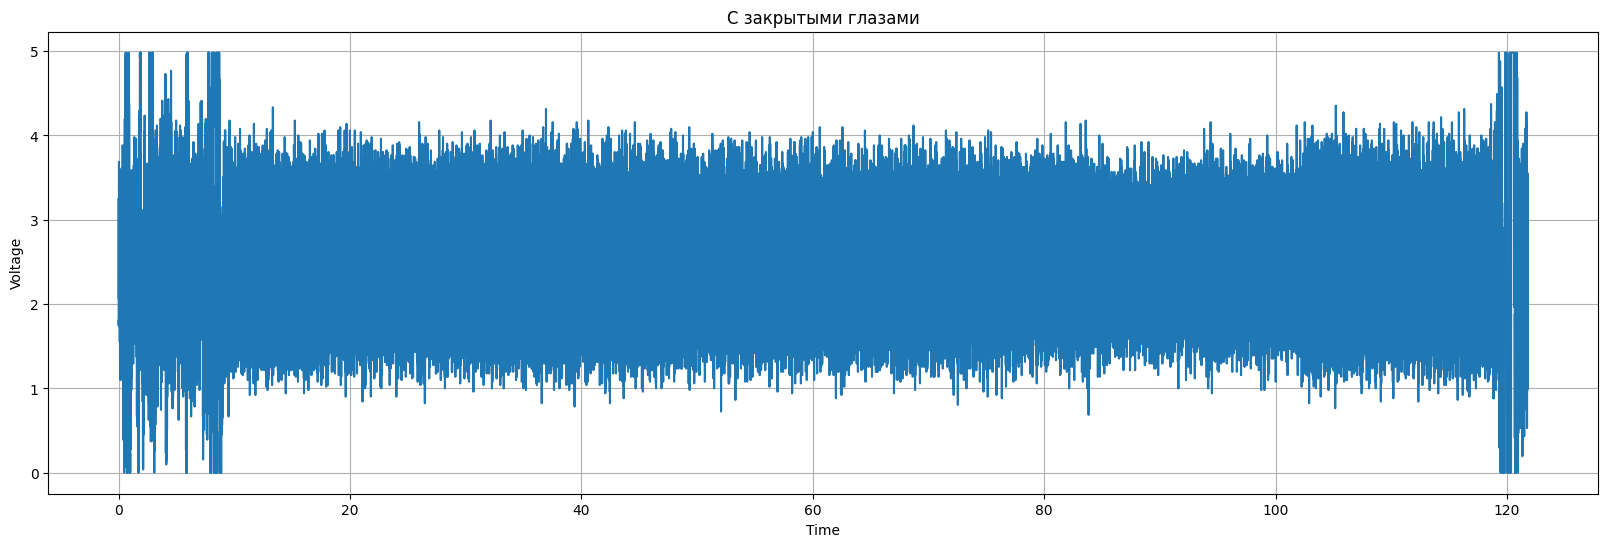

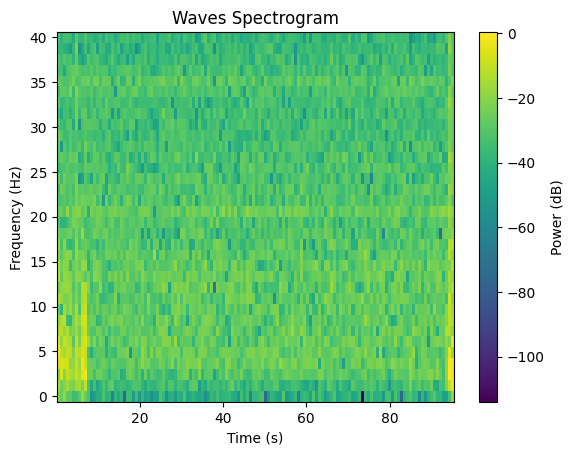

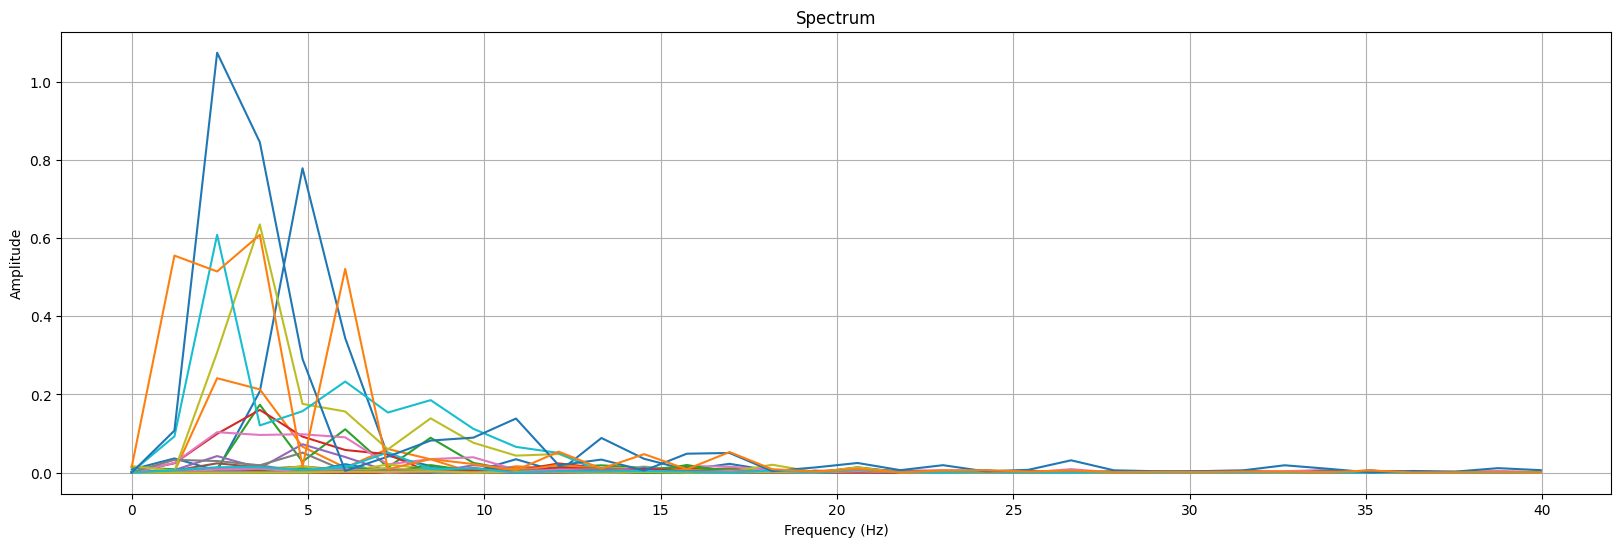

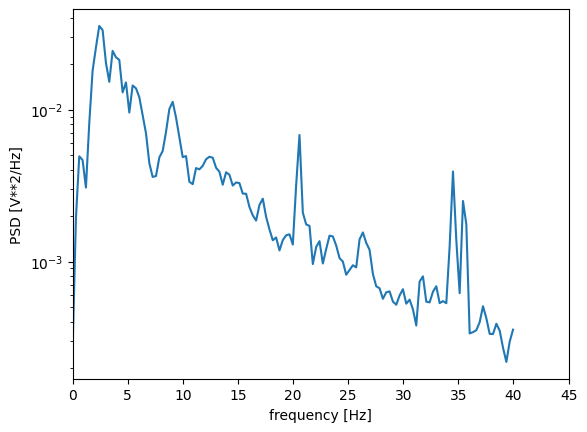

In [ ]:
plot_line(sleep,'С закрытыми глазами')
spectro(sleep)

##Закрытыми глазами и бодрая музыка

In [ ]:
music_hard = create("/content/EEG_2_music_hard.dat")

,x,y
0,0.000000,3.529412
1,0.004028,3.705882
2,0.004028,3.725490
3,0.008057,2.117647
4,0.012207,1.647059
...,...,...
41155,128.930054,3.725490
41156,128.934204,4.901961
41157,128.938110,4.666667
41158,128.942383,4.313725


In [ ]:
music_hard = music_hard.drop_duplicates(subset=['x'])

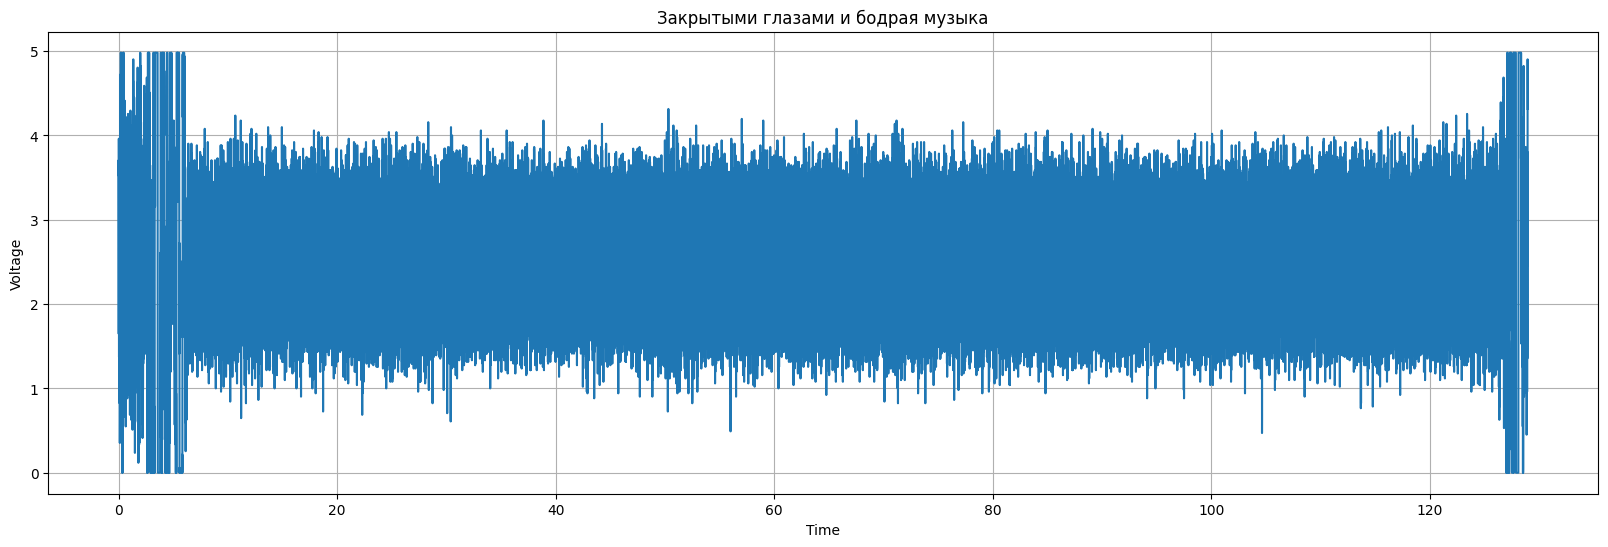

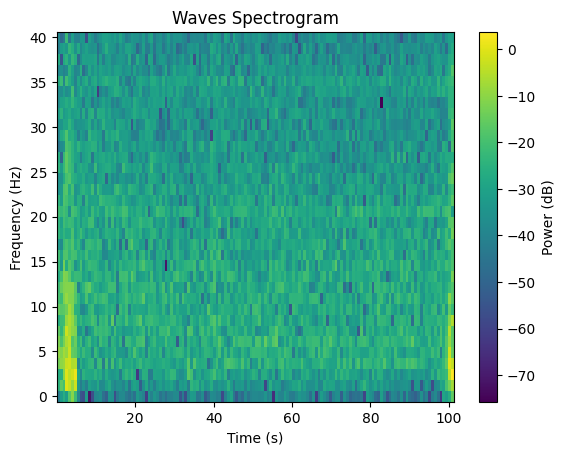

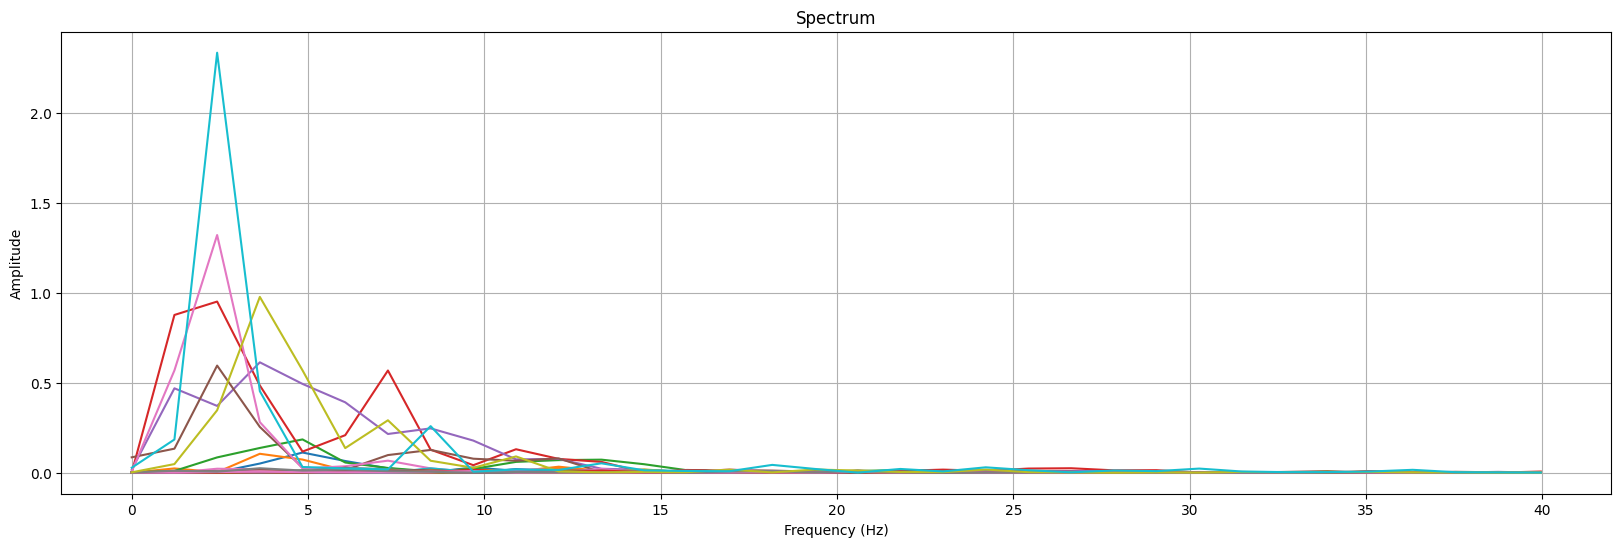

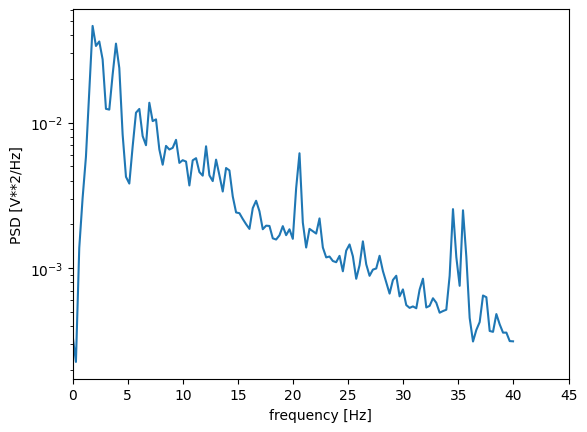

In [ ]:
plot_line(music_hard,'Закрытыми глазами и бодрая музыка')
spectro(music_hard)

##Закрытыми глазами и спокойная музыка

In [ ]:
music_soft = create("/content/EEG_2_music_soft.dat")

,x,y
0,0.000000,3.372549
1,0.004028,1.843137
2,0.008179,1.666667
3,0.008179,1.490196
4,0.012207,2.647059
...,...,...
38560,120.798584,3.254902
38561,120.802734,3.509804
38562,120.806885,3.627451
38563,120.806885,2.588235


In [ ]:
music_soft = music_soft.drop_duplicates(subset=['x'])

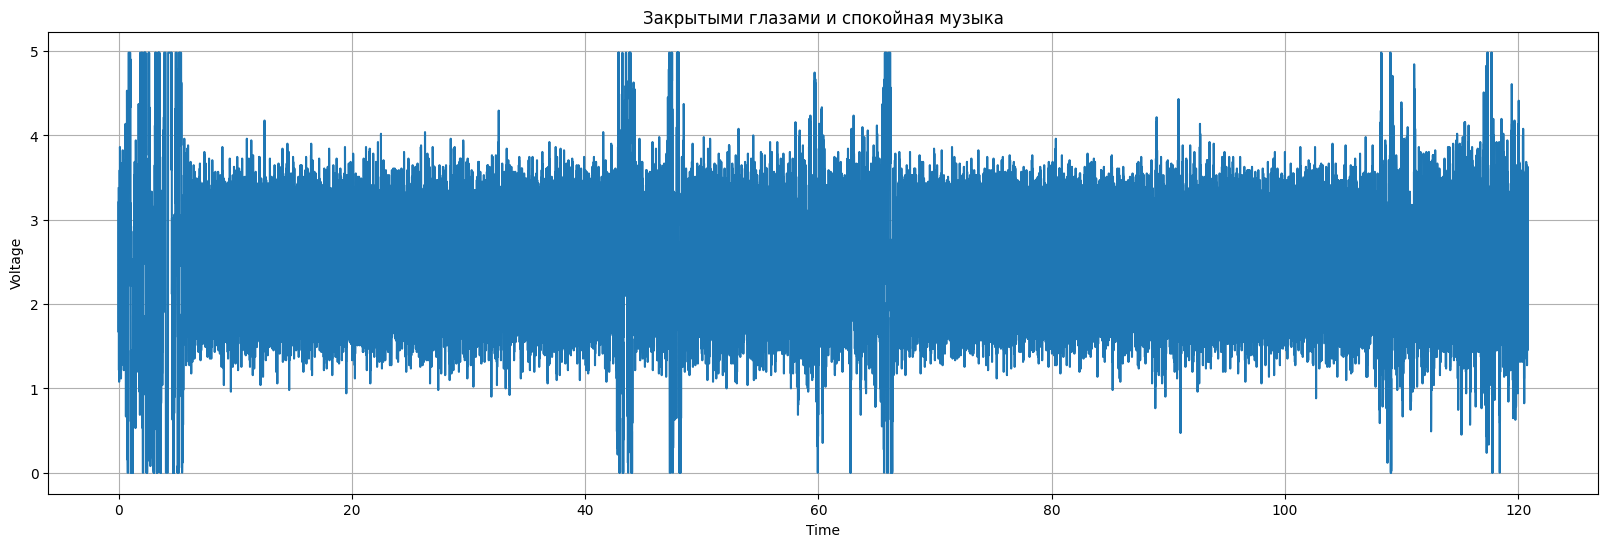

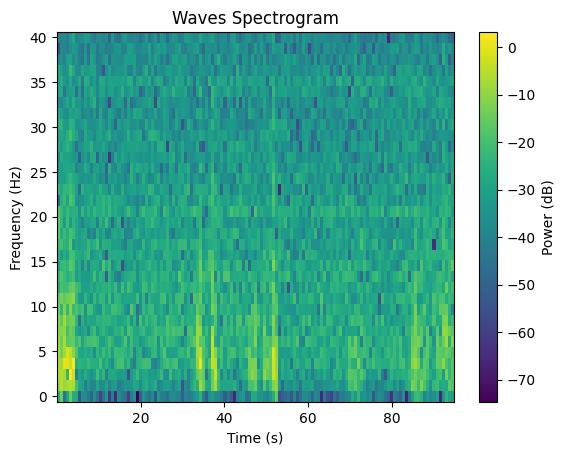

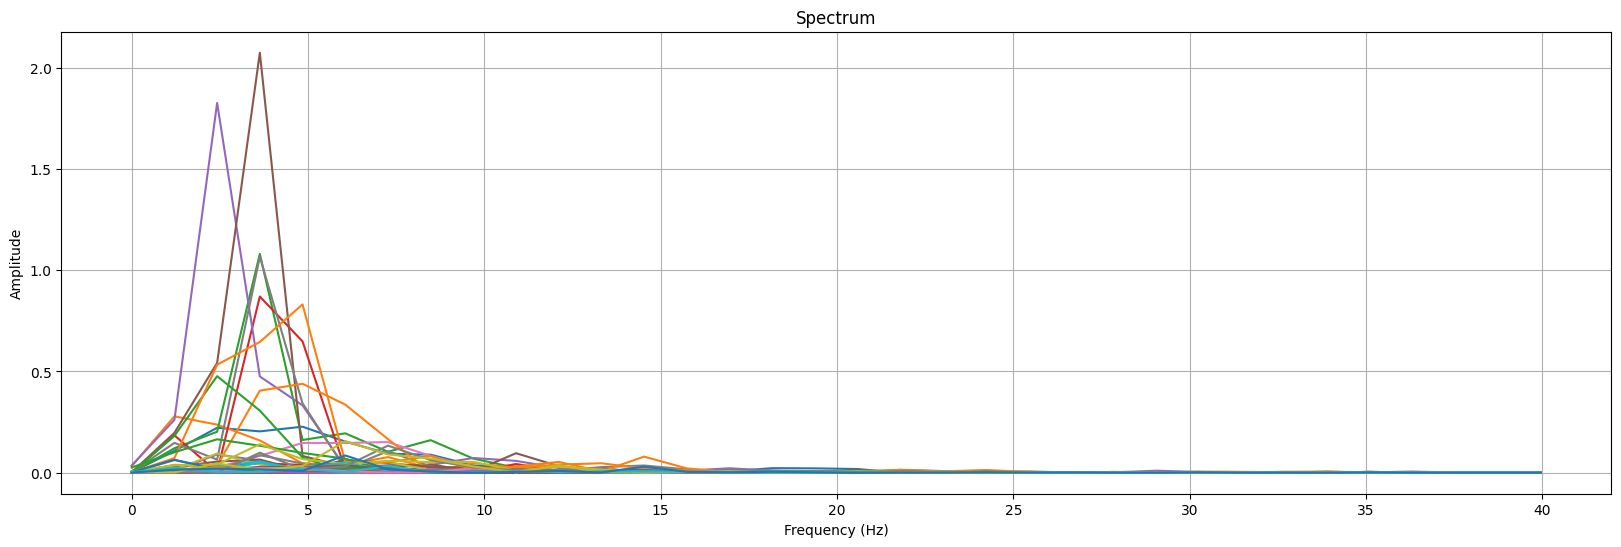

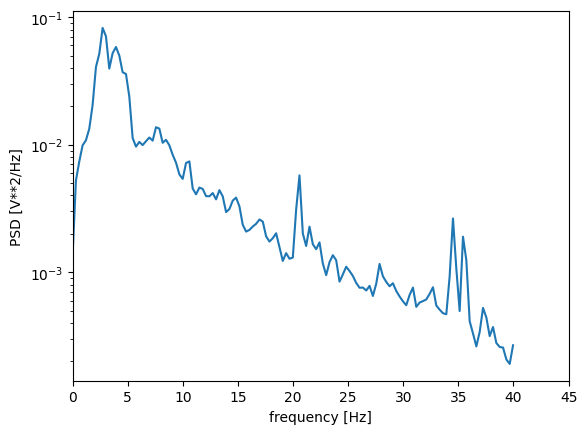

In [ ]:
plot_line(music_soft,'Закрытыми глазами и спокойная музыка')
spectro(music_soft)

#Вывод

**Вывод**: при разных видах деятельности у человека могут быть активны как альфа так и бета волны. Но при более спокойной деятельности не требующей особых мыслительных процессов преоблодает альфа-ритм с более низкими частотами и более высокой амплитудой. А при деятельности с большой мысленной нагрузкой преоблодает бета-ритм с более высокой частотой и меньшей амлитудой.